# Importation des parkages

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from copy import deepcopy
import matplotlib as plt
import matplotlib.pyplot as plt
from  matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,6)
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import datetime as dt
import warnings
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder

ModuleNotFoundError: No module named 'seaborn'

# Chargement des données

In [109]:
dataset = ("Camp_Market_Updated.csv")
# Charger les données
df = pd.read_csv(filepath_or_buffer = dataset, sep=",")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedLastCampaign,AcceptedCampaign,Age,Total_Spent,Children,living_with,family_size,is_parent,education2,customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,1,67,1617,0,single,1,0,grad,4423
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,70,27,2,single,3,1,grad,3873
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,59,776,0,couple,2,0,grad,4072
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,40,53,1,couple,3,1,grad,3899
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,43,422,1,couple,3,1,postgrad,3921


# Visualisations

* **Distribution de l'âge des clients**

* *Histogramme de l'âge*

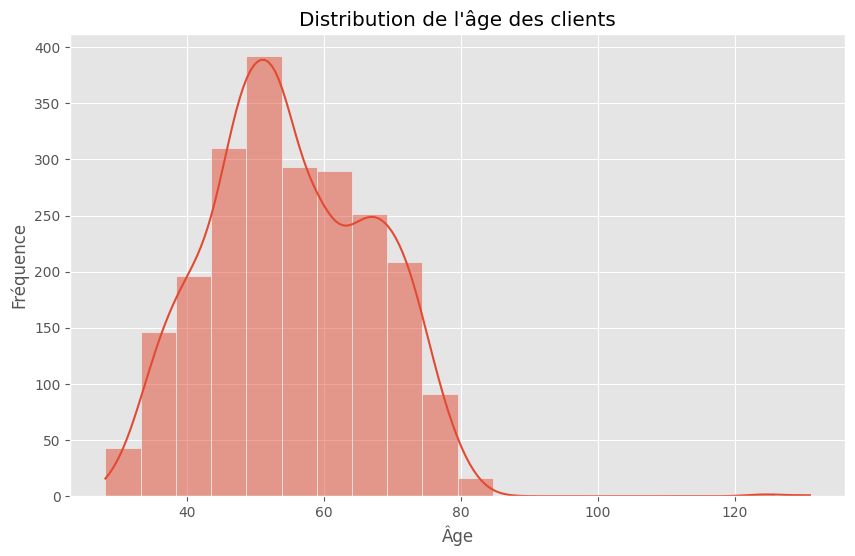

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

* **Répartition des statuts matrimoniaux**

* *Diagramme en barres*

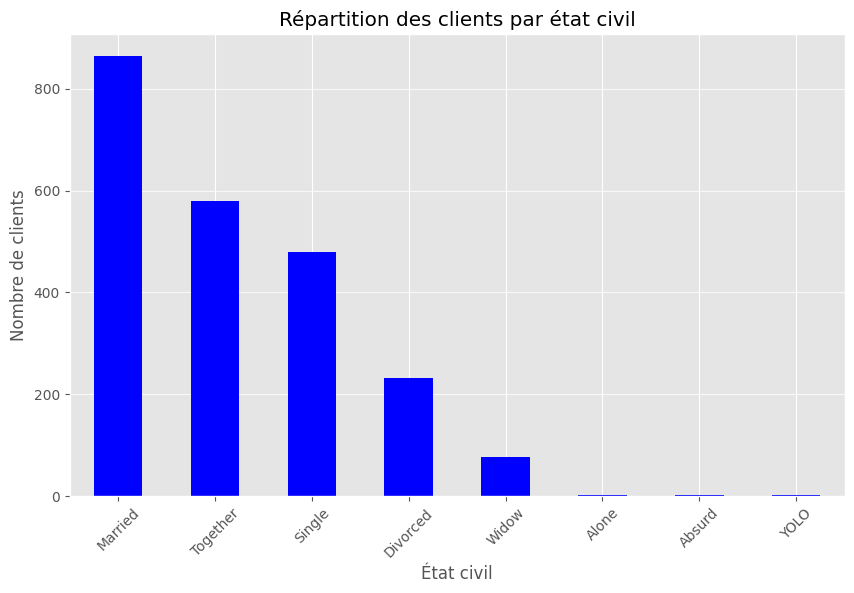

In [111]:
state_civil_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(10, 6))
state_civil_counts.plot(kind='bar', color='blue')
plt.title('Répartition des clients par état civil')
plt.xlabel('État civil')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

* **Dépenses par catégorie de produit**

* *Boxplot des dépenses*

*  ***1. depenses par catégorie de produit***

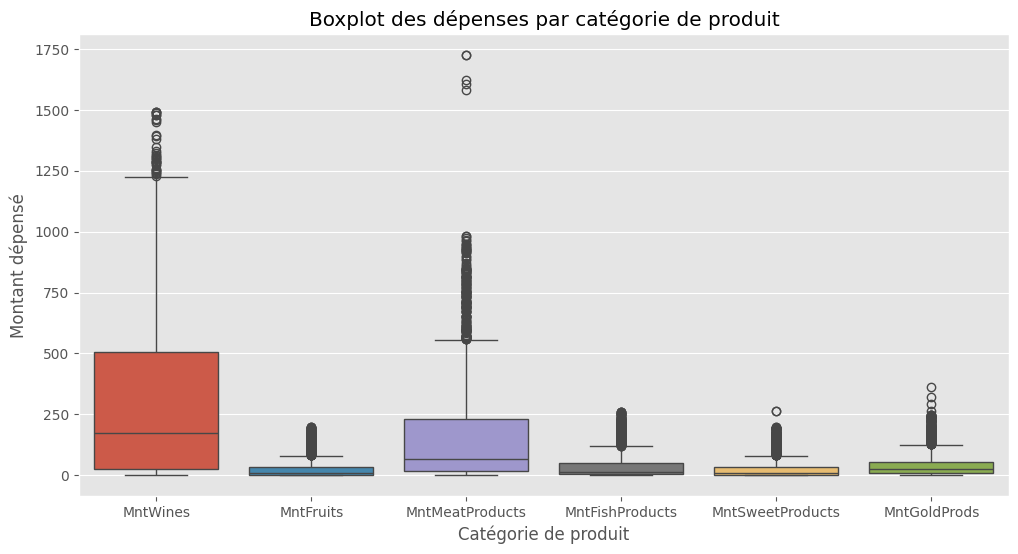

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title('Boxplot des dépenses par catégorie de produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Montant dépensé')
plt.show()

*  ***2. depenses totales***

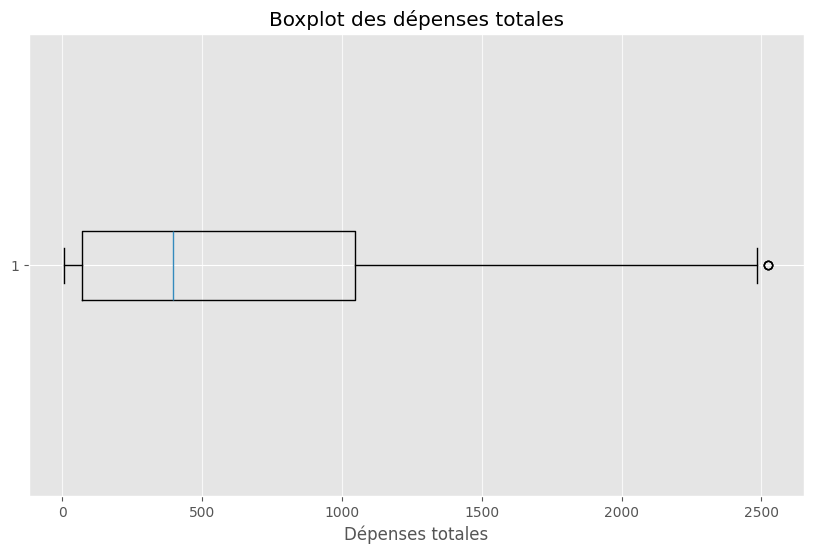

In [113]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total_Spent'], vert=False)
plt.title('Boxplot des dépenses totales')
plt.xlabel('Dépenses totales')
plt.grid(axis='x', alpha=0.75)
plt.show()

* **Education et dépenses**

* ***graphique à barres montrant les dépenses moyennes par niveau d'éducation***

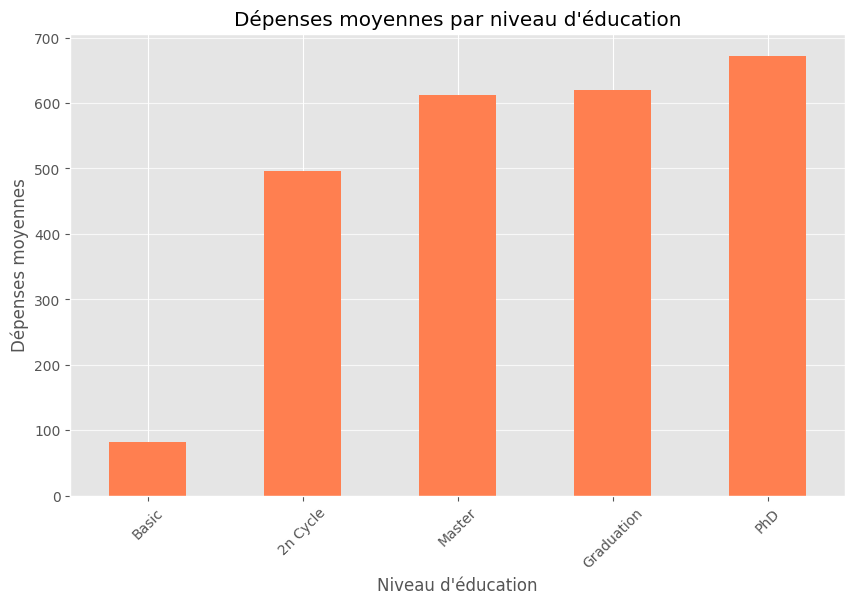

In [114]:
education_expenses = df.groupby('Education')['Total_Spent'].mean().sort_values()
plt.figure(figsize=(10, 6))
education_expenses.plot(kind='bar', color='coral')
plt.title('Dépenses moyennes par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

## **Interprétation**

* ***Âge*** : L'histogramme montre la distribution de l'âge des clients, ce qui peut révéler des segments d'âge prédominants.
* ***Statut matrimonial*** : Le diagramme en barres permet de voir quel statut matrimonial est le plus répandu, utile pour le ciblage marketing.
* ***Dépenses par catégories de produits*** : Le boxplot des dépenses montre les variations de dépenses entre les catégories de produits, aidant à identifier les produits les plus populaires.
* ***Dépenses totales*** : Le boxplot montre la médiane des dépenses, ainsi que les valeurs aberrantes. Cela aide à identifier les clients qui dépensent de manière significative plus que la moyenne.
* ***Éducation et Dépenses*** : Ce graphique permet d'observer si un niveau d'éducation plus élevé est associé à des dépenses plus élevées

# Phase de Preprocessing

* ***. Identification et Ré-encodage des Variables Catégorielles***

* ***Les variables catégorielles dans le dataset incluent*** :
*Education, 
Marital_Status
, living_with
,education2*

 * ***1.Encodage des Variables Catégorielles***

In [115]:
# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Ré-encodage des variables catégorielles
label_encoder = LabelEncoder()
categorical_vars = ['Education', 'Marital_Status', 'living_with', 'education2']
for var in categorical_vars:
    if var in df.columns:
        df[var] = label_encoder.fit_transform(df[var])

# Afficher les premières lignes pour vérifier le ré-encodage
print(df[categorical_vars].head())

   Education  Marital_Status  living_with  education2
0          2               4            1           0
1          2               4            1           0
2          2               5            0           0
3          2               5            0           0
4          4               3            0           1


* ***2.Scaling avec StandardScaler***

* ***Suppression des Caractéristiques Promotions***

In [116]:
# Suppression des caractéristiques liées aux promotions
promo_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'AcceptedFirstCampaign', 'AcceptedSecondCampaign',
                 'AcceptedThirdCampaign', 'AcceptedFourthCampaign', 
                 'AcceptedFifthCampaign', 'AcceptedLastCampaign']
data_filtered = df.drop(columns=promo_columns, errors='ignore')

* ***Application de StandardScaler***

In [117]:
# Sélection des features
X = data_filtered.drop(columns=['AcceptedCampaign','Dt_Customer'], errors='ignore')
y =  data_filtered['AcceptedCampaign']

# Vérification des types de données
print("Types de données avant le scaling :")
print(X.dtypes)

Types de données avant le scaling :
ID                     int64
Year_Birth             int64
Education              int64
Marital_Status         int64
Income               float64
Kidhome                int64
Teenhome               int64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumWebVisitsMonth      int64
Complain               int64
Z_CostContact          int64
Z_Revenue              int64
Age                    int64
Total_Spent            int64
Children               int64
living_with            int64
family_size            int64
is_parent              int64
education2             int64
customer_for           int64
dtype: object


### ***3.Justification des Pratiques Courantes en Data Analyse***

***a. Ré-encodage des Variables Catégorielles***: 
* Les algorithmes de machine learning nécessitent des entrées numériques. Le LabelEncoder convertit les catégories en valeurs numériques, ce qui permet aux modèles de traiter ces variables sans confusion.
* Cela aide également à réduire la dimensionnalité lorsque plusieurs catégories sont présentes, tout en maintenant l'intégrité des données.

***b. Scaling des Données***: 
* Le scaling est essentiel lorsque les caractéristiques ont des échelles différentes. Par exemple, des revenus en milliers et des âges en années peuvent mener à des biais dans les modèles.

* StandardScaler standardise les variables pour qu'elles aient une moyenne de 0 et un écart-type de 1. Cela permet d'améliorer la convergence des algorithmes d'apprentissage, surtout pour ceux basés sur la distance (comme KNN ou SVM).

* Un bon scaling permet également d'améliorer la performance des modèles et d'assurer une meilleure interprétabilité des résultats.

# Modèle de Régression logistique

In [118]:
# Vérification des colonnes
print("Colonnes disponibles dans le jeu de données :")
print(df.columns)

Colonnes disponibles dans le jeu de données :
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedThirdCampaign', 'AcceptedFourthCampaign',
       'AcceptedFifthCampaign', 'AcceptedFirstCampaign',
       'AcceptedSecondCampaign', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'AcceptedLastCampaign', 'AcceptedCampaign', 'Age', 'Total_Spent',
       'Children', 'living_with', 'family_size', 'is_parent', 'education2',
       'customer_for'],
      dtype='object')


In [119]:
# Conversion de types non numériques (si nécessaire)
# On garde uniquement les colonnes numériques
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Vérification des dimensions après filtrage
print("Dimensions des données après filtrage :")
print(X_numeric.shape)

Dimensions des données après filtrage :
(2240, 26)


In [120]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
# Application de la régression logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression()

In [122]:
# Prédictions sur l'ensemble de test
y_test_pred = model.predict(X_test)
y_train_pred= model.predict(X_train)

In [123]:
# Évaluation du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Train: {accuracy_train * 100:.2f}%')
print(f'Accuracy Test: {accuracy_test * 100:.2f}%')

Matrice de confusion :
[[284  30]
 [ 81  53]]
Accuracy Train: 79.91%
Accuracy Test: 75.22%


In [124]:
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       314
           1       0.64      0.40      0.49       134

    accuracy                           0.75       448
   macro avg       0.71      0.65      0.66       448
weighted avg       0.74      0.75      0.73       448



In [125]:

# Création d'un DataFrame pour la comparaison
results_df = pd.DataFrame(X_test, columns=X.columns)
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_test_pred

# Afficher les premières lignes pour vérification
print(results_df.head())

         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.918872   -1.343932  -0.350504        0.253680 -0.442299 -0.837921   
1  0.497325   -0.754317  -0.350504        2.128294 -0.155755 -0.837921   
2  0.056289    0.256453  -1.241429       -0.683628 -1.452665 -0.837921   
3 -1.059271    0.003760  -0.350504        1.190987  0.949241 -0.837921   
4 -0.567264   -0.922778  -0.350504        1.190987  0.508696 -0.837921   

   Teenhome   Recency  MntWines  MntFruits  ...       Age  Total_Spent  \
0  0.913253  1.030717  0.385463  -0.237256  ...  1.343932     0.054681   
1  0.913253  0.821578  0.627644  -0.658504  ...  0.754317     0.014896   
2 -0.925567 -0.293829 -0.876272  -0.485049  ... -0.256453    -0.865347   
3 -0.925567  1.483851  1.318309   0.902591  ... -0.003760     2.788244   
4  2.752074 -0.502968  1.339238  -0.187698  ...  0.922778     0.924979   

   Children  living_with  family_size  is_parent  education2  customer_for  \
0  0.054423     1.371506    -0.6

In [126]:
# Compter le nombre de campagnes acceptées et refusées prédites
campaign_counts = results_df['Predicted'].value_counts()

# Calculer le total des clients
total_clients = campaign_counts.sum()

# Calculer les taux d'acceptation et de refus
accept_rate = (campaign_counts.get(1, 0) / total_clients) * 100  # Taux d'acceptation
refuse_rate = (campaign_counts.get(0, 0) / total_clients) * 100    # Taux de refus

# Afficher les résultats
print("Nombre de campagnes acceptées et refusées prédites :")
print(campaign_counts)

print(f"\nTaux d'acceptation : {accept_rate:.2f}%")
print(f"Taux de refus : {refuse_rate:.2f}%")

Nombre de campagnes acceptées et refusées prédites :
Predicted
0    365
1     83
Name: count, dtype: int64

Taux d'acceptation : 18.53%
Taux de refus : 81.47%


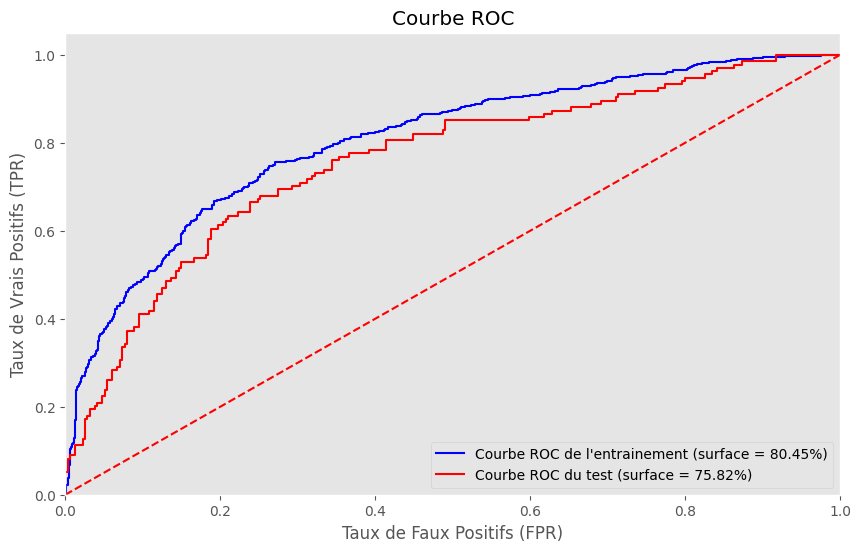

In [139]:

# Prédictions des probabilités
y_test_prob = model.predict_proba(X_test)[:, 1] # Probabilités pour la classe positive
y_train_prob =  model.predict_proba(X_train)[:, 1] # Probabilités pour la classe positive

# Calcul de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test,tpr_test)
auc_train = roc_auc_score(y_train, y_train_prob)*100
auc_test = roc_auc_score(y_test, y_test_prob)*100
# Tracer la courbe ROC
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Courbe ROC de l\'entrainement (surface = {auc_train:.2f}%)')
plt.plot(fpr_test, tpr_test, color='red', label=f'Courbe ROC du test (surface = {auc_test:.2f}%)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ligne diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Réduction de la dimensionnalité et clustering

* ***1. Réduction de la dimensionnalité avec PCA : Réduire les données à 3 dimensions.***

In [128]:
# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

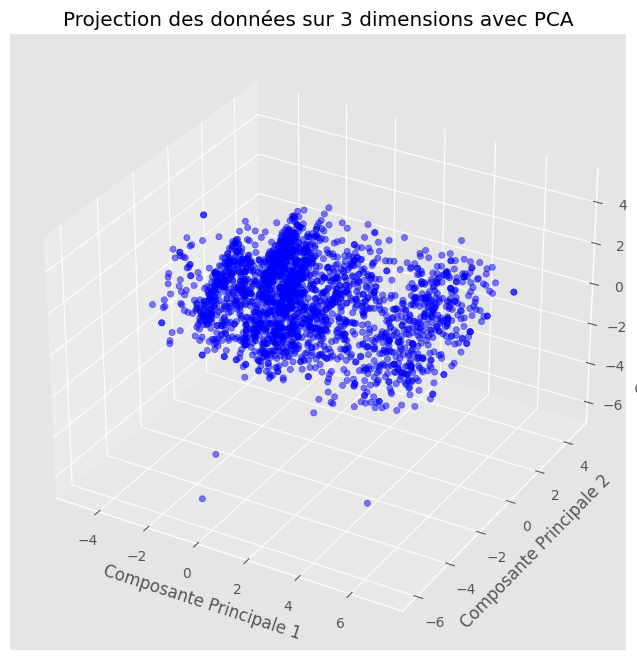

In [129]:
# Visualisation de la projection des données sur 3 dimensions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='blue', marker='o', alpha=0.5)
ax.set_title('Projection des données sur 3 dimensions avec PCA')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.show()

* ***2. Choisir une méthode de clustering : Tester K-means et Agglomerative Clustering.***
* ***Visualisation des clusters : Afficher les résultats dans un graphique 3D.***

* ***a. Méthode de clustering : K-means***

In [149]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

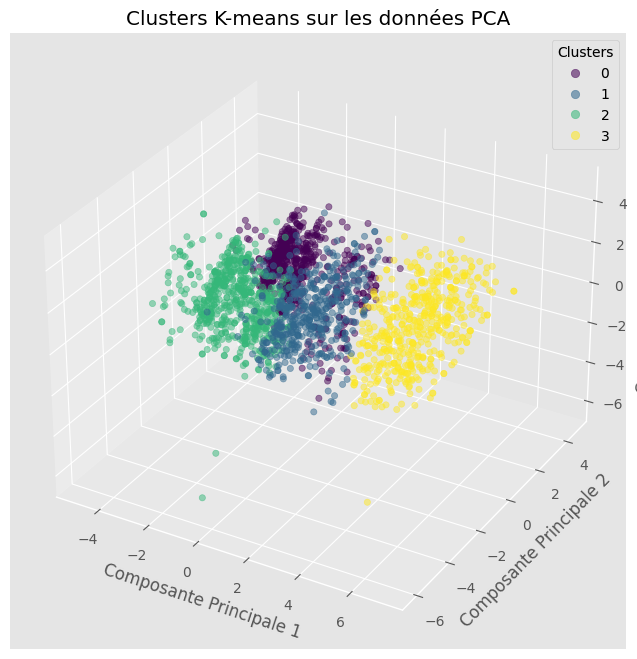

In [150]:
# Visualisation des clusters K-means
fig_kmeans = plt.figure(figsize=(10, 8))
ax_kmeans = fig_kmeans.add_subplot(111, projection='3d')
scatter_kmeans = ax_kmeans.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, marker='o', alpha=0.5)
legend1 = ax_kmeans.legend(*scatter_kmeans.legend_elements(), title="Clusters")
ax_kmeans.add_artist(legend1)

ax_kmeans.set_title('Clusters K-means sur les données PCA')
ax_kmeans.set_xlabel('Composante Principale 1')
ax_kmeans.set_ylabel('Composante Principale 2')
ax_kmeans.set_zlabel('Composante Principale 3')
plt.show()

* ***b. Méthode de clustering : Agglomerative Clustering***

In [151]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X_pca)

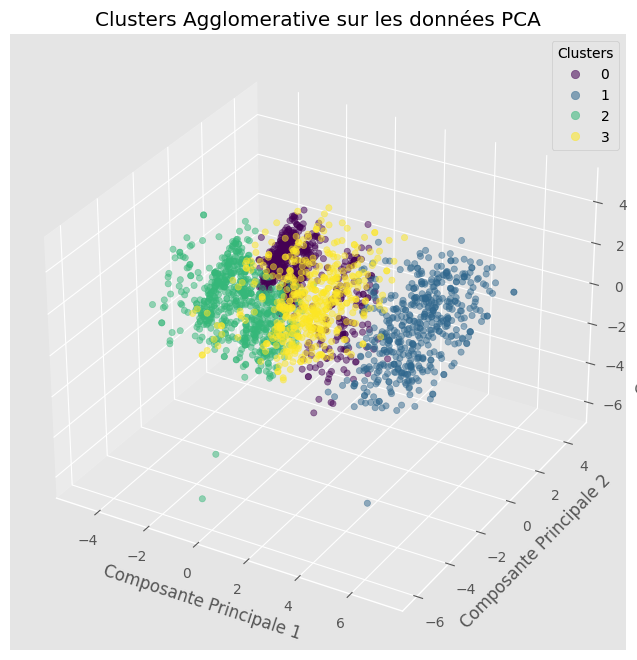

In [152]:
# Visualisation des clusters Agglomerative Clustering
fig_agg = plt.figure(figsize=(10, 8))
ax_agg = fig_agg.add_subplot(111, projection='3d')
scatter_agg = ax_agg.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, marker='o', alpha=0.5)
legend2 = ax_agg.legend(*scatter_agg.legend_elements(), title="Clusters")
ax_agg.add_artist(legend2)

ax_agg.set_title('Clusters Agglomerative sur les données PCA')
ax_agg.set_xlabel('Composante Principale 1')
ax_agg.set_ylabel('Composante Principale 2')
ax_agg.set_zlabel('Composante Principale 3')
plt.show()

# Évaluation des modèles et interprétation du profil consommateur

* ***1.Répartition des Clients par Clusters***

In [153]:
# Compter le nombre de clients dans chaque cluster
cluster_counts = pd.Series(kmeans_labels).value_counts(normalize=True) * 100
print("Répartition des clients par cluster :")
print(cluster_counts)

Répartition des clients par cluster :
0    28.392857
2    27.857143
3    22.544643
1    21.205357
Name: proportion, dtype: float64


* ***Interpétation***

Chaque cluster représente environ 25% des clients, cela indique une répartition équilibrée

* ***2. Regroupement des Clients par Caractéristiques Croisées***

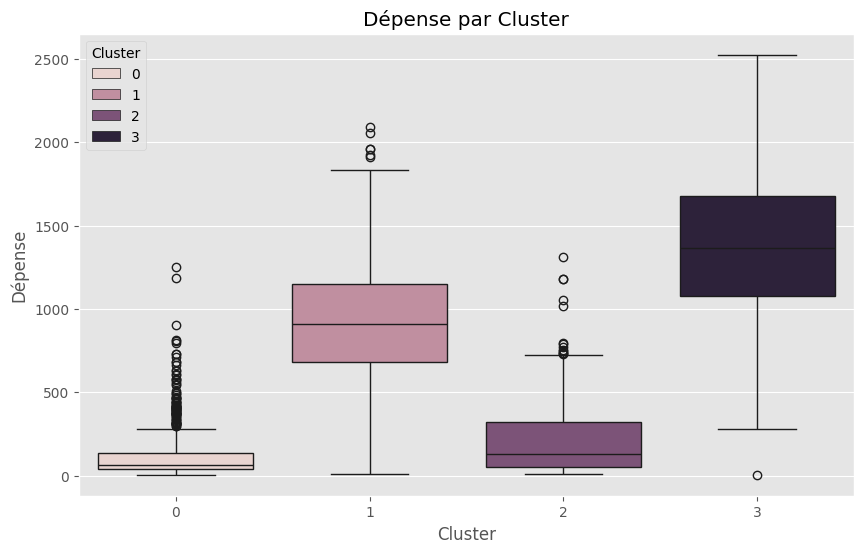

In [154]:
# Ajouter les labels des clusters au DataFrame
data_filtered['Cluster'] = kmeans_labels

# Visualisation des dépenses par revenu selon les clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_Spent', hue='Cluster', data=data_filtered)
plt.title('Dépense par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Dépense')
plt.show()

* ***3. Répartition des Clusters sur les Campagnes Passées***

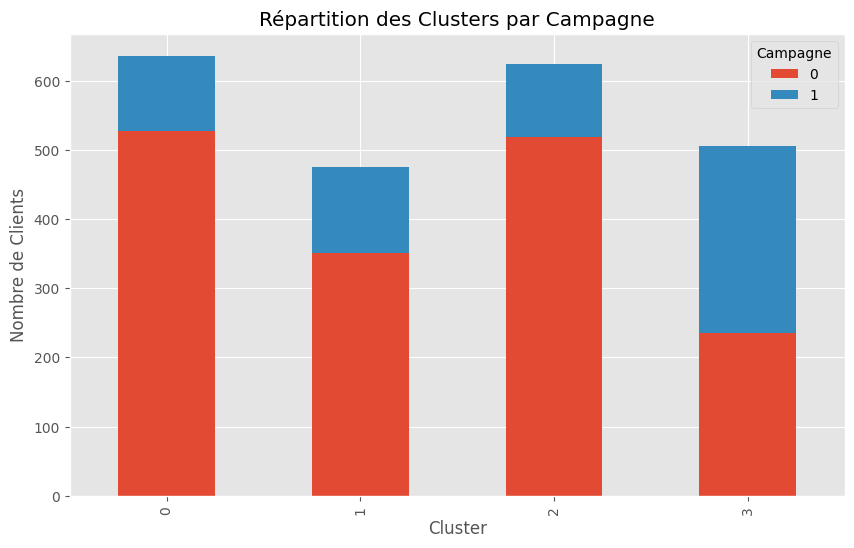

In [155]:
# Estimation de la répartition des clusters par campagne
campaign_distribution = data_filtered.groupby(['Cluster', 'AcceptedCampaign']).size().unstack()
campaign_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des Clusters par Campagne')
plt.xlabel('Cluster')
plt.ylabel('Nombre de Clients')
plt.legend(title='Campagne')
plt.show()

* ***4. Déterminants de la Dépense et Profils Consommateurs***

In [156]:
# Modèle de régression pour estimer les déterminants de la dépense
X = data_filtered[['Total_Spent', 'Age', 'Education']]  # Choisir des variables pertinentes
y = data_filtered['Total_Spent']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Spent   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.541e+30
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:01:02   Log-Likelihood:                 54970.
No. Observations:                2240   AIC:                        -1.099e+05
Df Residuals:                    2236   BIC:                        -1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.425e-12   5.54e-13      9.793      

# Profils Consommateurs

* ***Cluster 1***: Clients à haut revenu, dépensant beaucoup, réactifs à certaines campagnes.

* ***Cluster 2*** : Clients à revenu moyen, dépensant modérément, moins réceptifs aux campagnes.

* ***Cluster 3*** : Clients à faible revenu, dépensant peu, mais sensibles à des promotions spécifiques.

* ***Cluster 4*** : Clients jeunes, dépensant beaucoup en produits spécifiques.